In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.shape

(1000, 39)

**The insurance claim fraud detection dataset comprises 1000 rows and 39 columns, including both numerical and categorical values. Of these, 37 columns represent the independent variables, while one column serves as the target variable. Given that the target variable is categorical, we will employ classification techniques for this project.**

### Data Exploratory Analysis(EDA)

In [5]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38],
      dtype='int64')

Form above we can noice that , The column name is missing so we will rename the columns as specified below for better understanding of the data: 
1. months_as_customer
2. age
3. policy_number
4. policy_bind_date
5. policy_state
6. policy_csl
7. policy_deductable
8. policy_annual_premium
9. umbrella_limit
10. insured_zip
11. insured_sex
12. insured_education_level
13. insured_occupation
14. insured_hobbies
15. insured_relationship
16. capital_gains
17. capital_loss
18. incident_date
19. incident_type
20. collision_type
21. incident_severity
22. authorities_contacted
23. incident_state
24. incident_city
25. incident_location
26. incident_hour_of_the_day
27. number_of_vehicles_involved
28. property_damage
29. bodily_injuries
30. witnesses
31. police_report_available
32. total_claim_amount
33. injury_claim
34. property_claim
35. vehicle_claim
36. aut739auto_model
38. auto_year
39. _c39
40. fraud_reported

In [6]:
columns_name = ["months_as_customer","age","policy_number","policy_bind_date","policy_state","policy_csl","policy_deductable","policy_annual_premium","umbrella_limit",
           "insured_zip","insured_sex","insured_education_level","insured_occupation","insured_hobbies","insured_relationship","capital_gains","capital_loss","incident_date",
           "incident_type","collision_type","incident_severity","authorities_contacted","incident_state","incident_city","incident_location",
        "incident_hour_of_the_day","number_of_vehicles_involved","property_damage","bodily_injuries","witnesses","police_report_available",
        "total_claim_amount","injury_claim","property_claim","vehicle_claim","auto_make","auto_model","auto_year","fraud_reported"
]

We created a list to define the new column names

In [7]:
df.columns=columns_name

We defined column names 

In [8]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**From above infomation we can observe that**
- The dataset's index values range from 0 to 999, covering 1000 rows.
- It includes columns with three distinct data types: Float, Object, and Int.
- Specifically, there are missing values within the 'authorities_contacted' column.

#### Checking Null,Nan and other values

In [10]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital_gains                   0
capital_loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [11]:
for i in df.columns:
    print(i,df[i].unique(),'\n')

months_as_customer [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

**From above we can observed that**
- Analyze the unique values in each column
- Identify dates not in date type format
- Detect special character (?) present in 'police_report_available' column 

In [12]:
for i in df.columns:
    print(i,df[i].value_counts(),'\n')

months_as_customer months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64 

age age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64 

policy_number policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64 

policy_bind_date policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-19

We analyze unique value counts of each value in each columns

In [13]:
#importing the date time
from datetime import datetime
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'],format='%d-%m-%Y')

Converted the 'policy_bind_date' column object to datetype 

In [14]:
df['incident_date']=pd.to_datetime(df['incident_date'],format='%d-%m-%Y')

Converted the 'incident_date' column object to datetype 

In [15]:
df['police_report_available']=df['police_report_available'].replace('?',np.nan)

Replaced '?' character to 'Nan Value' in column 'police_report_available'

In [16]:
df['property_damage']=df['property_damage'].replace('?',np.nan)

Replaced '?' character to 'Nan Value' in column 'property_damage'

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

Now the data type is chanaged of columns 'policy_bind_date' and 'incident_date' object to datetime

#### Handling Nan Values

In [18]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)

In [19]:
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)

In [20]:
df['authorities_contacted'].unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

The'authorities_contacted' column contains unique values such as 'Police' ,'Fire', 'Other'and 'Ambulance', with some null values. To handel missing data,Nan values in this column we will replace Nan values with 'other'

In [21]:
df['authorities_contacted'].fillna('Other',inplace=True)

In [22]:
for i in df.columns:
    print(i,df[i].unique(),'\n')

months_as_customer [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

In [23]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

**Completed Exploratory Data Analysis (EDA), we are now proceeding to the data visualization phase**

### Data Visualization

#### 1.Univarite Analysis

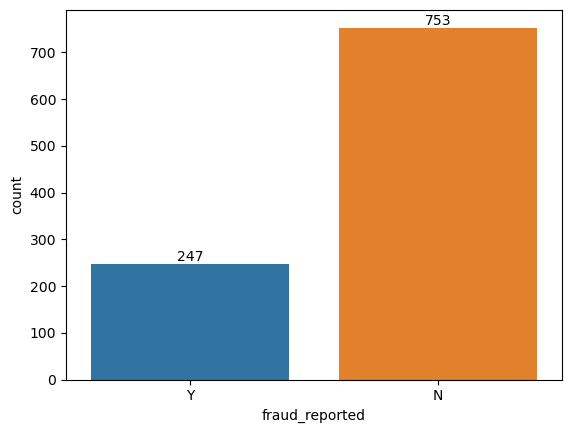

In [25]:
ax=sns.countplot(data=df,x='fraud_reported')
for bar in ax.containers:
    ax.bar_label(bar)

From the graph above,it is evident that the count of 'YES' in fraud reports significantly exceeds that of 'NO'. This indicates a class imbalance issue

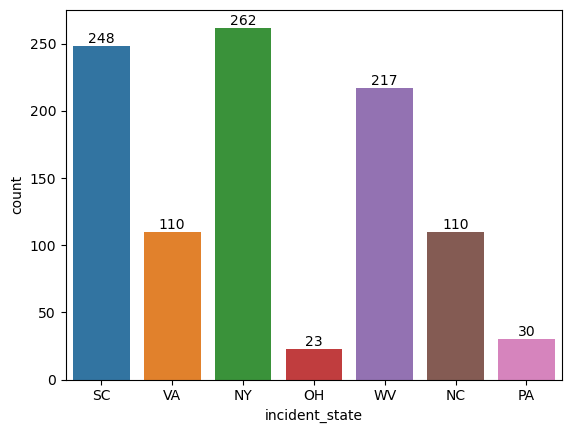

In [26]:
ax=sns.countplot(data=df,x='incident_state')
for bar in ax.containers:
    ax.bar_label(bar)

**From above graph we can observed that**
- New York (NY) and South Carolina (SC) have the highest number of incidents, regardless of whether they are fraudulent or not.
- West Virginia (WV) also shows a significant number of incidents, followed by Virginia (VA) and North Carolina (NC).
- Ohio (OH) and Pennsylvania (PA) have the lowest number of incidents reported.

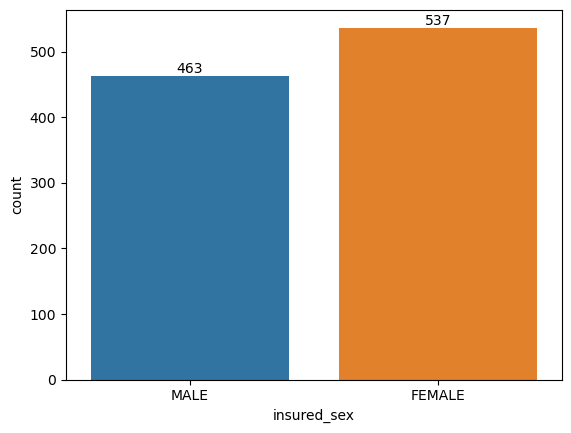

In [27]:
ax=sns.countplot(data=df,x='insured_sex')
for bar in ax.containers:
    ax.bar_label(bar)

**From above graph we can observed that**
- The number of claims filed by females (537) is higher compared to those filed by males (463).
- This suggests that females are more likely to file insurance claims than males.

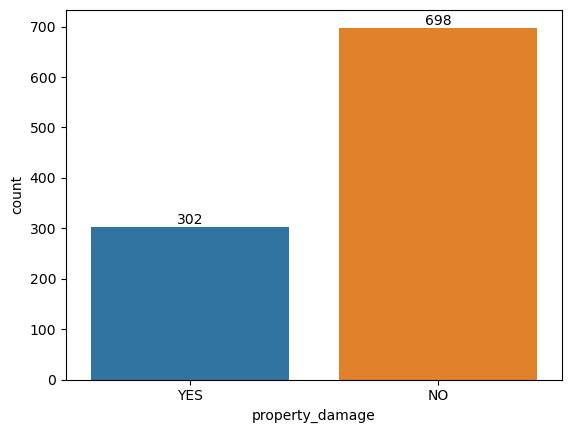

In [28]:
ax=sns.countplot(data=df,x='property_damage')
for bar in ax.containers:
    ax.bar_label(bar)

**From above graph we can observed that**
- The number of claims without property damage (698) is more than double the number of claims with property damage (302).
- This indicates that property damage is less frequently reported compared to incidents with no property damage.

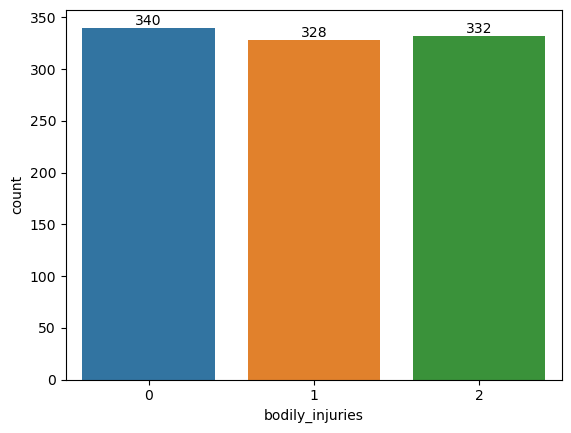

In [29]:
ax=sns.countplot(data=df,x='bodily_injuries')
for bar in ax.containers:
    ax.bar_label(bar)

**From above graph we can observed that**
- The distribution of claims involving bodily injuries is relatively balanced across the three categories (0, 1, 2).
- There are slightly more claims with no bodily injuries (340) compared to those with one (328) or two (332) bodily injuries.

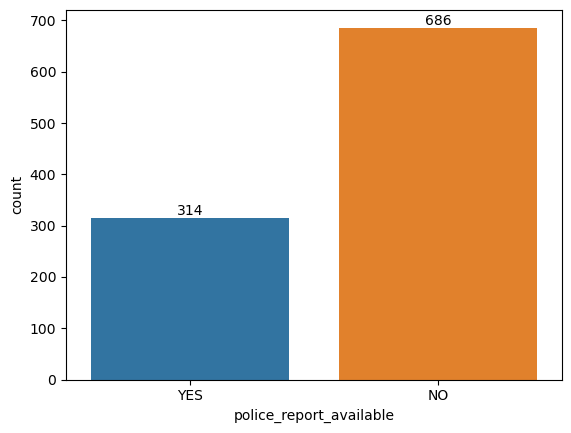

In [30]:
ax=sns.countplot(data=df,x='police_report_available')
for bar in ax.containers:
    ax.bar_label(bar)

The graph highlights that a significant portion of insurance claim fraud cases lack accompanying police reports. This absence can hinder thorough investigation and verification processes crucial for detecting fraudulent claims. 

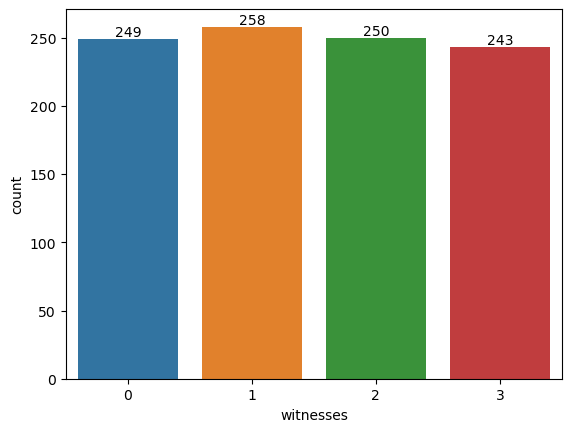

In [31]:
ax=sns.countplot(data=df,x='witnesses')
for bar in ax.containers:
    ax.bar_label(bar)

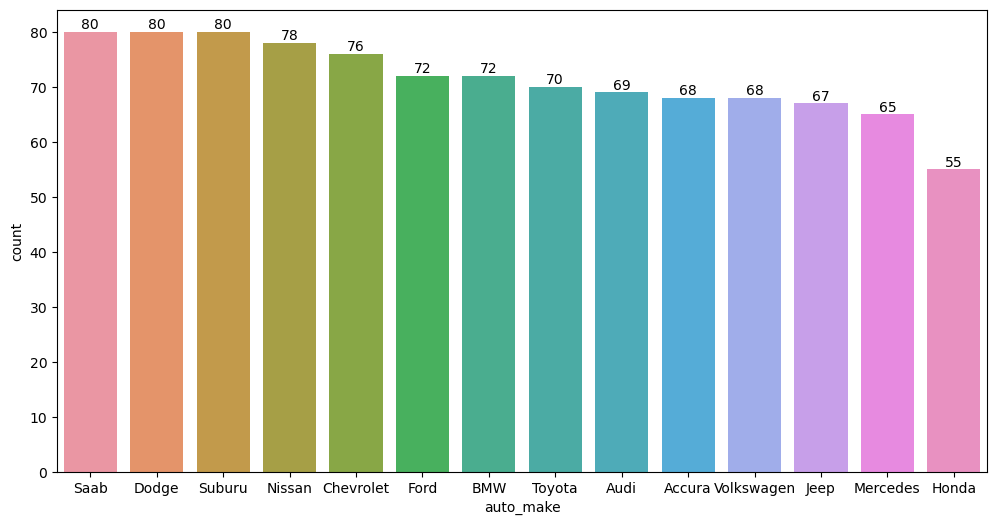

In [32]:
# Count the occurrences of each auto_make
counts = df['auto_make'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='auto_make', order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

**From above graph we can observed that**
#### Auto Make Distribution
1. **High Fraud Incidence Makes**:
   - **Saab, Dodge, Subaru** have the highest fraud report counts (80 each), suggesting that these makes are more frequently involved in fraud cases.
   
2. **Moderate Fraud Incidence Makes**:
   - **Nissan, Chevrolet, Ford** also have high counts, indicating these makes are commonly reported in fraud cases.
   - **BMW, Toyota, Audi** have substantial fraud report counts as well.

3. **Low Fraud Incidence Makes**:
   - **Honda** has the lowest count (55), indicating it is the least frequently involved in fraud reports.
   - **Mercedes, Jeep, Volkswagen, Acura** also have lower counts compared to other makes.
     
**Overall Conclusions**
- Fraud reports are more common among certain auto makes like Saab, Dodge, and Subaru.
- Honda is the least common make in fraud reports, suggesting lower fraud incidence.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'machine-op-inspct'),
  Text(1, 0, 'prof-specialty'),
  Text(2, 0, 'tech-support'),
  Text(3, 0, 'sales'),
  Text(4, 0, 'exec-managerial'),
  Text(5, 0, 'craft-repair'),
  Text(6, 0, 'transport-moving'),
  Text(7, 0, 'other-service'),
  Text(8, 0, 'priv-house-serv'),
  Text(9, 0, 'armed-forces'),
  Text(10, 0, 'adm-clerical'),
  Text(11, 0, 'protective-serv'),
  Text(12, 0, 'handlers-cleaners'),
  Text(13, 0, 'farming-fishing')])

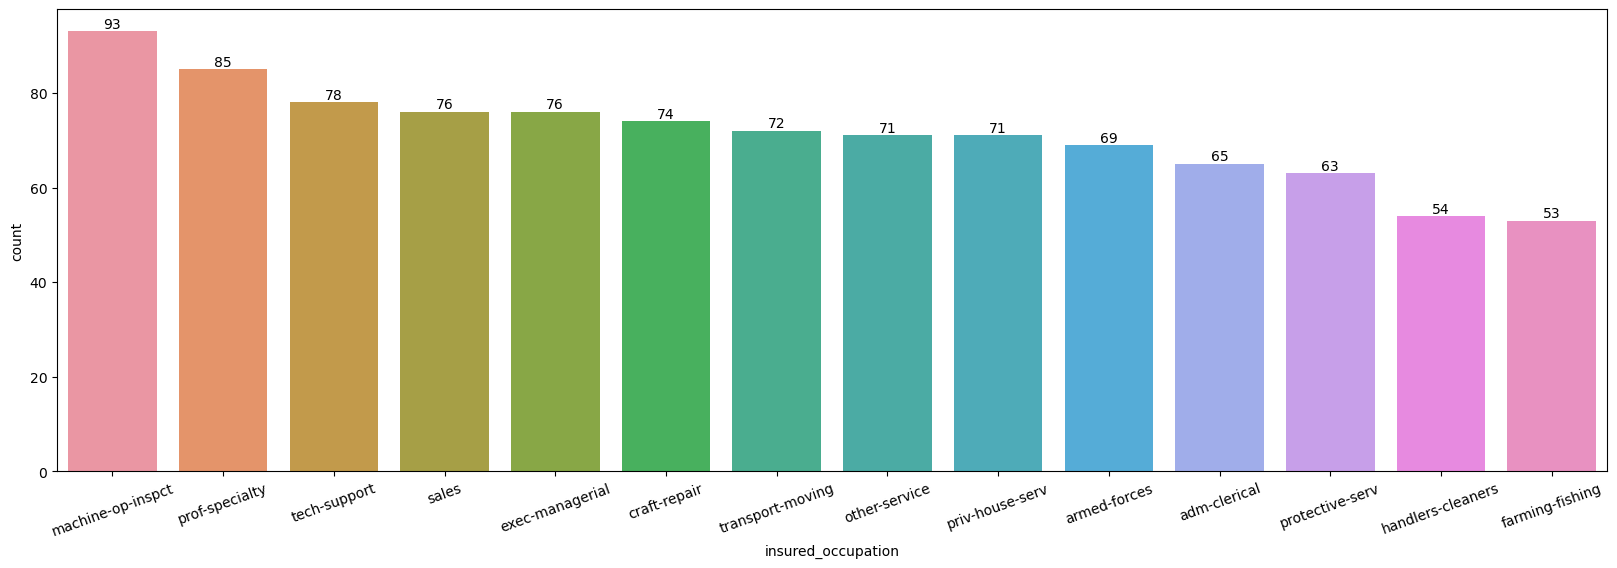

In [33]:
# Count the occurrences of each auto_make
counts = df['insured_occupation'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='insured_occupation', order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=20)

**From above graph we can observed that**
### Auto Make Distribution
 Occupation Distribution
1. **High Fraud Incidence Occupations**:
   - **Professional Specialty** and **Machine Operators/Inspectors** have the highest counts (85 and 80 respectively), indicating these occupations are frequently involved in fraud reports.

2. **Moderate Fraud Incidence Occupations**:
   - **Tech Support, Sales, Executive Managerial, Craft Repair** have moderate counts, suggesting these occupations also have a notable incidence of fraud reports.

3. **Low Fraud Incidence Occupations**:
   - **Protective Service, Handlers/Cleaners, Farming/Fishing** have the lowest counts, indicating these occupations are less frequently involved in fraud reports.

**Overall Conclusions:**
   - Fraud reports are higher among Professional Specialty and Machine Operator/Inspector occupations.
   - Occupations such as Protective Service, Handlers/Cleaners, and Farming/Fishing show lower fraud report counts.

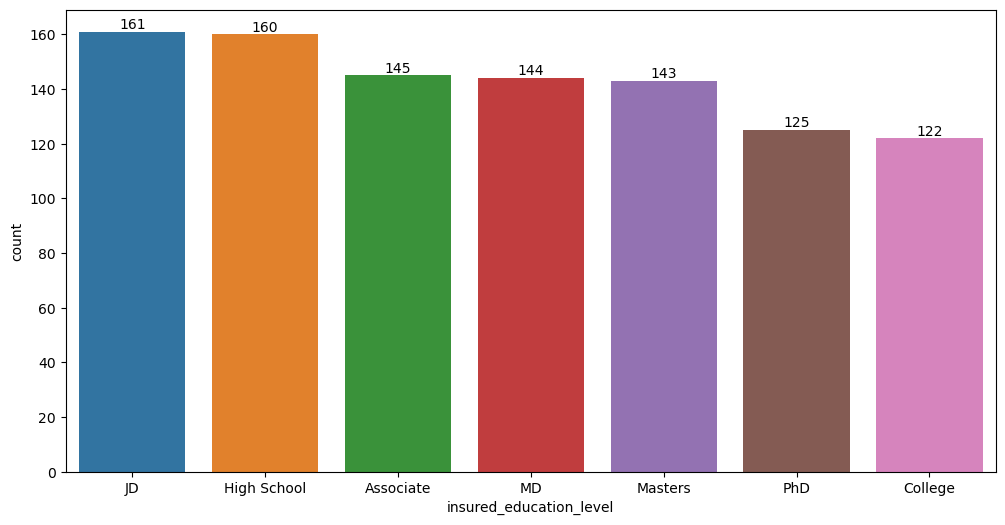

In [34]:
# Count the occurrences of each auto_make
counts = df['insured_education_level'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='insured_education_level', order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

**From above graph we can observed that**
#### Education Level Distribution
1. **High Fraud Incidence Education Levels**:
   - **JD holders** have the highest count (161), indicating a higher incidence of fraud reports among individuals with this degree.
   - **High School graduates** also show a high count (160), suggesting a significant incidence of fraud.

2. **Moderate Fraud Incidence Education Levels**:
   - **Associate, MD, Masters** degree holders have similar counts, indicating moderate fraud report incidences in these categories.

3. **Low Fraud Incidence Education Levels**:
   - **PhD and College graduates** have the lowest counts, indicating fewer fraud reports among individuals with these education levels.
     
**Overall Conclusions**
- Individuals with JD degrees and High School graduates are more frequently involved in fraud reports.
- PhD and College graduates are less frequently reported in fraud cases, indicating lower fraud incidence

#### 2. Bivariate Analysis

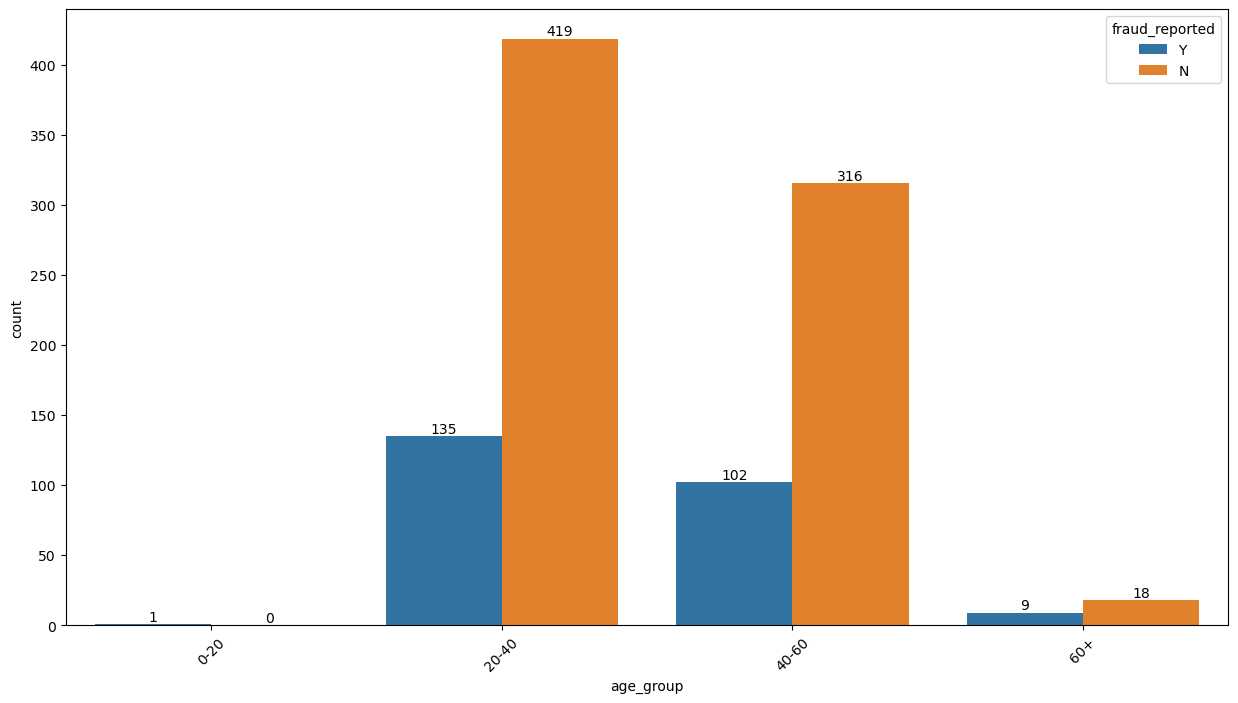

In [35]:
plt.figure(figsize=(15,8))
# Define new age groups
bins = [0, 20, 40, 60, 100]  # Adjust the upper limit of the last bin if necessary
labels = ['0-20', '20-40', '40-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
ax=sns.countplot(data=df,x='age_group',hue='fraud_reported')
for bar in ax.containers:
    ax.bar_label(bar)
plt.xticks(rotation=45)    
plt.show()   

**From above graph we can observed that**
- The 20-40 age group has the highest number of non-fraudulent claims, followed by the 40-60 age group.
- There are notable instances of reported fraud in both the 20-40 and 40-60 age groups.
- Very few fraudulent claims are reported in the 0-20 and 60+ age groups, with the latter showing slightly more non-fraudulent claims.

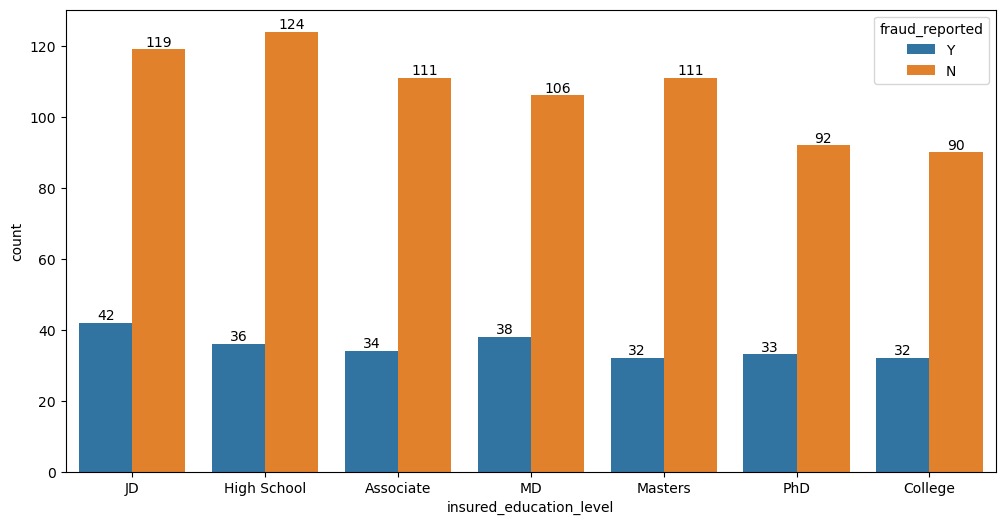

In [36]:
# Count the occurrences of each auto_make
counts = df['insured_education_level'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='insured_education_level',hue='fraud_reported',order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

**From above graph we can observed that**
- Across all education levels, the number of non-fraudulent claims ('N') is significantly higher than the number of fraudulent claims ('Y').
- The highest incidence of reported fraud is seen among those with a JD degree, followed by individuals with an MD.
- High school graduates have the highest number of non-fraudulent claims, closely followed by those with an Associate degree and a Master's degree

In [37]:
column_name=[col for col in df.columns if df[col].dtype=='object' ]
unique_values=[df[col].nunique() for col in column_name]

In [38]:
data_frame=pd.DataFrame({'col_name':column_name,
                        'value':unique_values})

In [39]:
data_frame.sort_values('value', ascending=False)

,col_name,value
13,incident_location,1000
17,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
16,auto_make,14
3,insured_education_level,7
11,incident_state,7
12,incident_city,7
6,insured_relationship,6
9,incident_severity,4


In [40]:
df.drop(['incident_location','auto_model','insured_hobbies','insured_occupation','auto_make','policy_number','age_group','policy_bind_date','incident_date'],axis=1,inplace=True)

#### Checking Outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'months_as_customer'),
  Text(1, 0, 'age'),
  Text(2, 0, 'policy_deductable'),
  Text(3, 0, 'policy_annual_premium'),
  Text(4, 0, 'umbrella_limit'),
  Text(5, 0, 'insured_zip'),
  Text(6, 0, 'capital_gains'),
  Text(7, 0, 'capital_loss'),
  Text(8, 0, 'incident_hour_of_the_day'),
  Text(9, 0, 'number_of_vehicles_involved'),
  Text(10, 0, 'bodily_injuries'),
  Text(11, 0, 'witnesses'),
  Text(12, 0, 'total_claim_amount'),
  Text(13, 0, 'injury_claim'),
  Text(14, 0, 'property_claim'),
  Text(15, 0, 'vehicle_claim'),
  Text(16, 0, 'auto_year')])

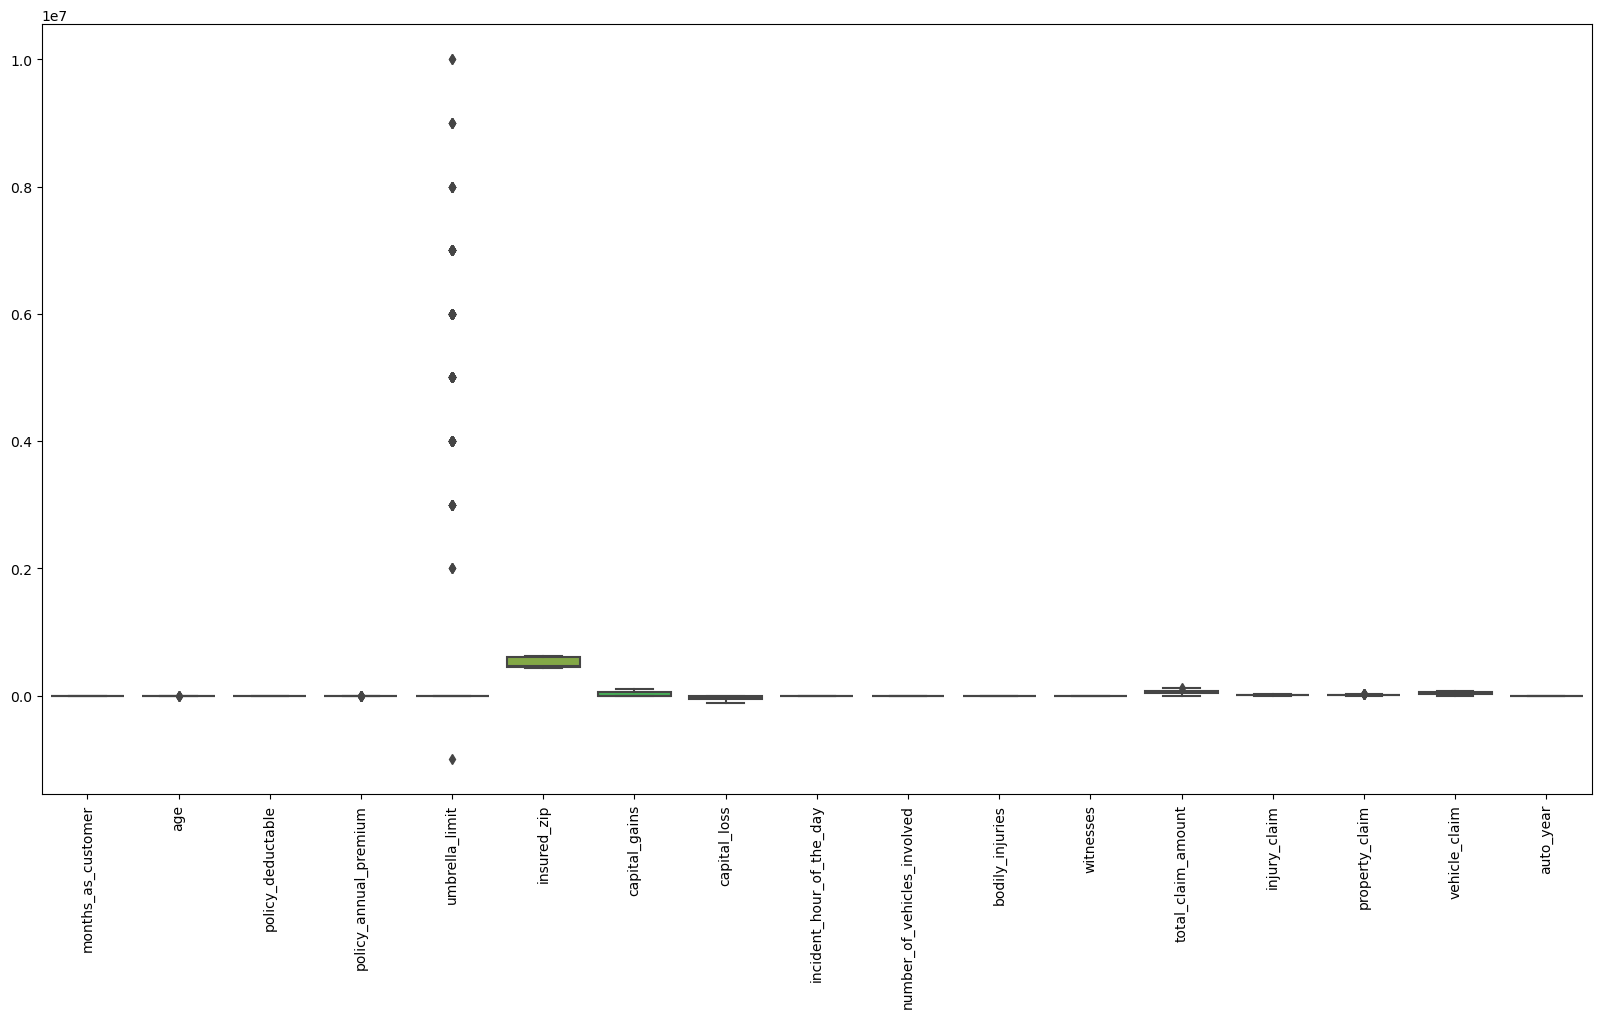

In [41]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)

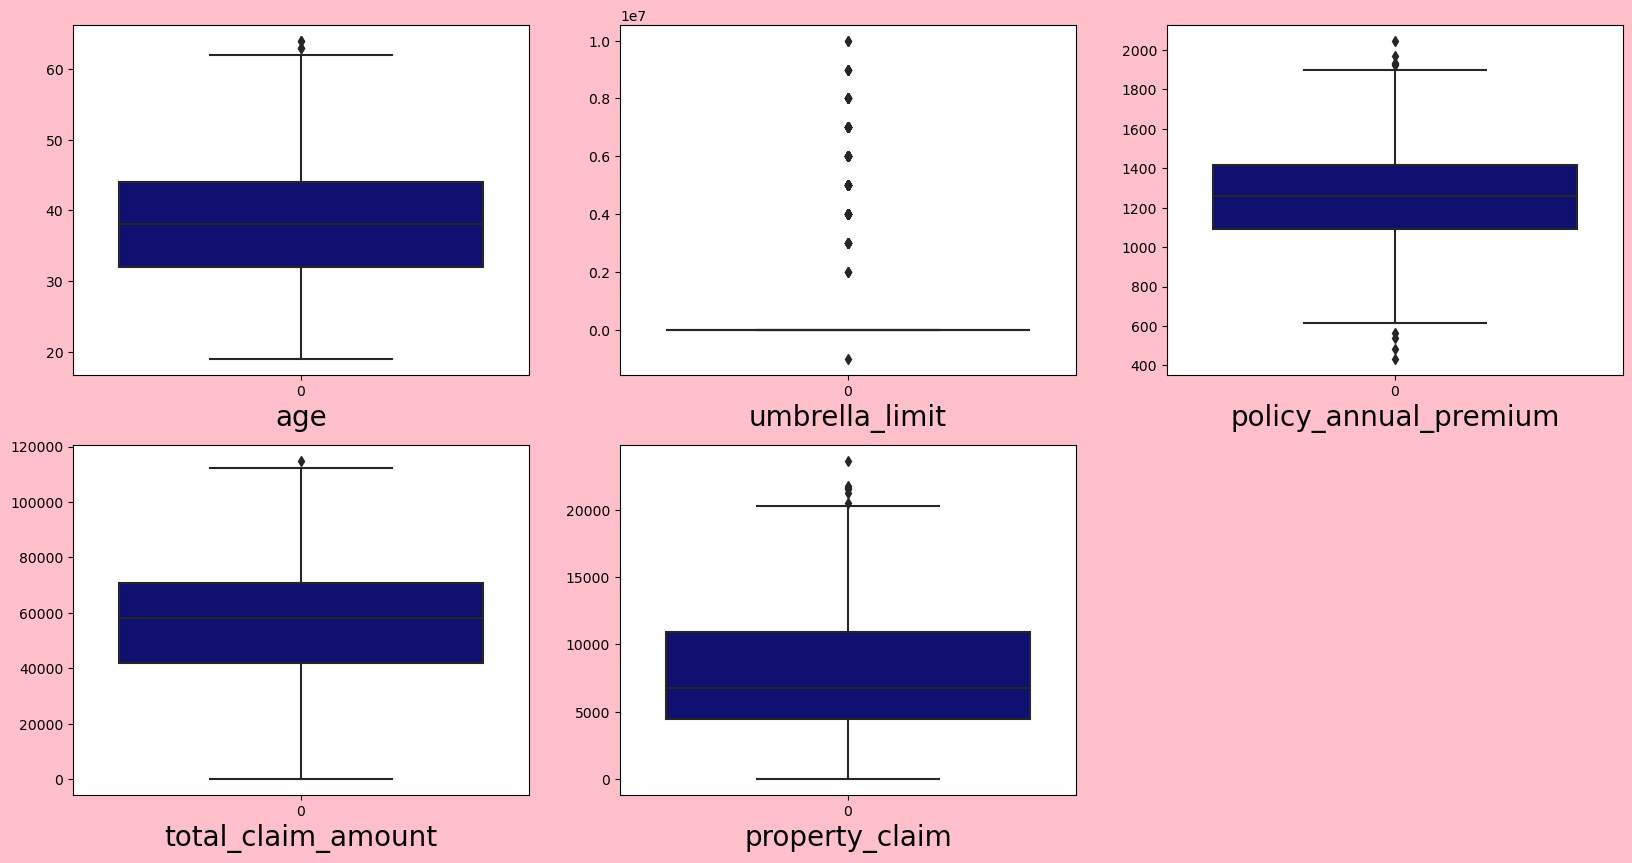

In [42]:
plt.figure(figsize=(20,10),facecolor='pink')
count=1
list=['age', 'umbrella_limit', 'policy_annual_premium','total_claim_amount','property_claim']
for i in list:
    if count<=10:
        ax=plt.subplot(2,3,count)
        sns.boxplot(df[i],color='navy')
        plt.xlabel(i,fontsize=20)
    count+=1

We observed the outilers but instead of removing the  we will go with the outliers 

### Performing Encoding

In [43]:
#importing Encoder label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list=['policy_csl','policy_state','authorities_contacted','collision_type','incident_type','incident_severity','insured_relationship','insured_education_level',
      'incident_state','incident_city','insured_relationship','fraud_reported','insured_sex','police_report_available','property_damage']
for column in list:
    df[column]=labelencoder.fit_transform(df[column])

We used a Label encoder here transforming categorical values in numerical form

### Checking Skewness

In [44]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_relationship           0.077488
capital_gains                  0.478850
capital_loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.235971
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


### Checking correlation between target variable and independent variables

In [45]:
corr_matrix=df.corr()

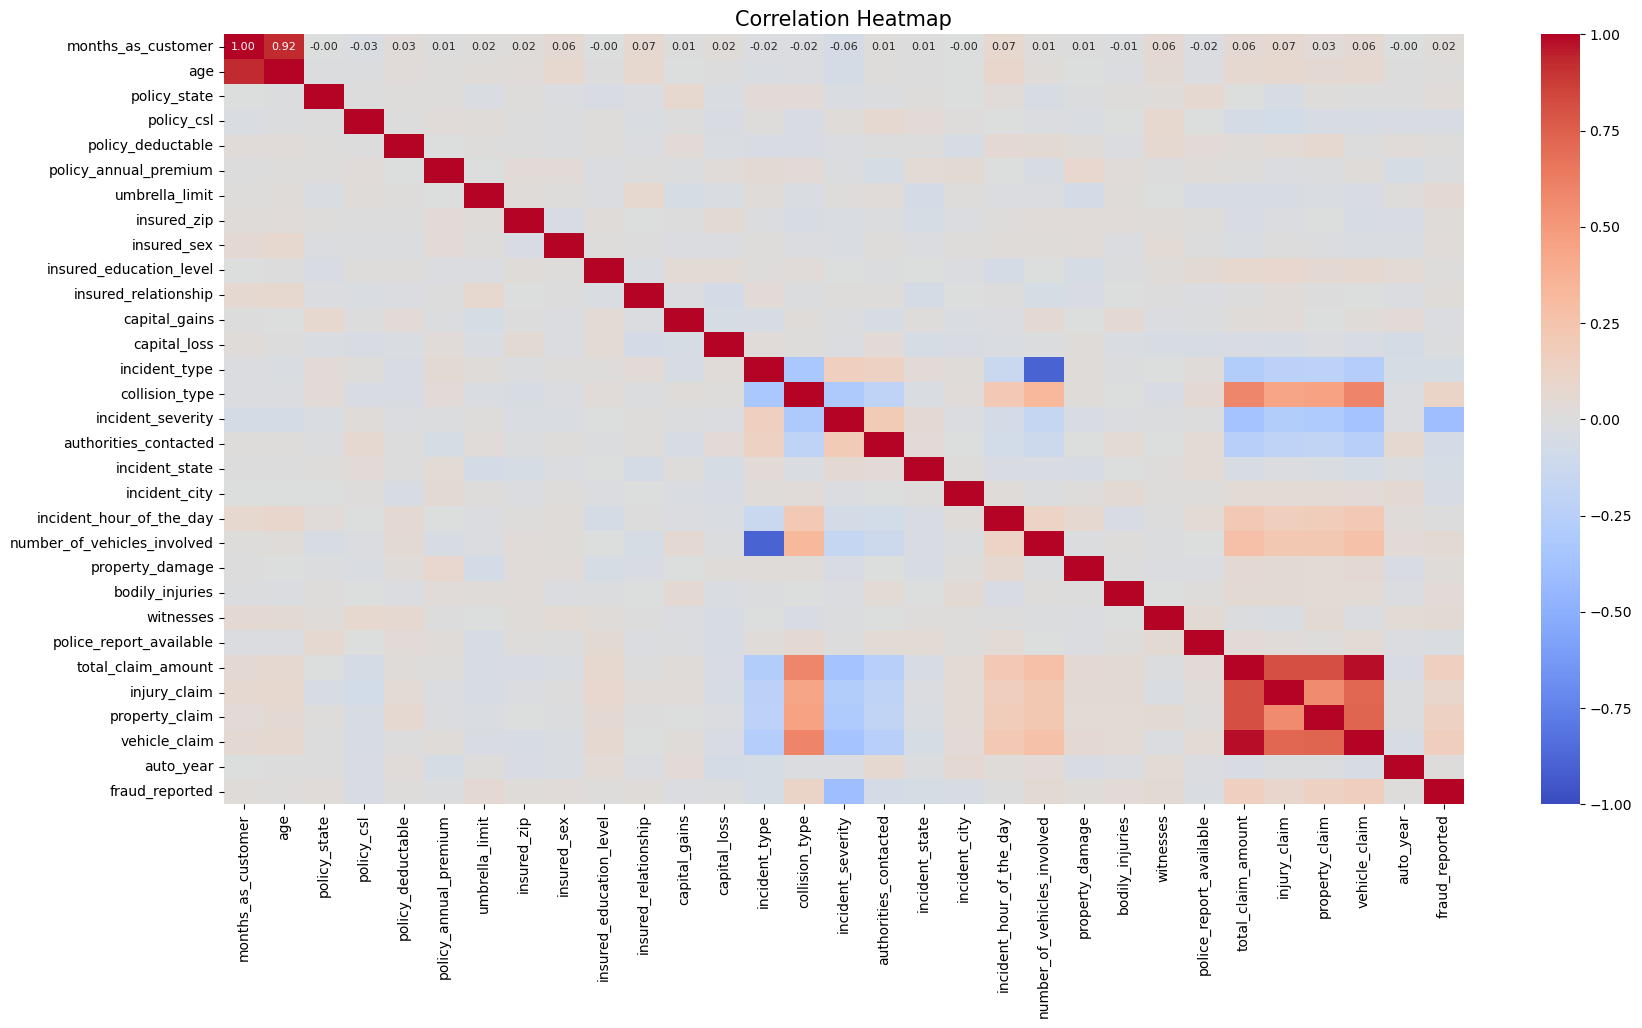

In [46]:
# Create a heatmap with annotations
plt.figure(figsize=(20, 10))  # Increase the height a bit to make room for labels
heatmap = sns.heatmap(data=corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, annot_kws={"size": 8})

# Customize the ticks and labels
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add a title for clarity
plt.title('Correlation Heatmap', fontsize=15)

# Display the heatmap
plt.show()

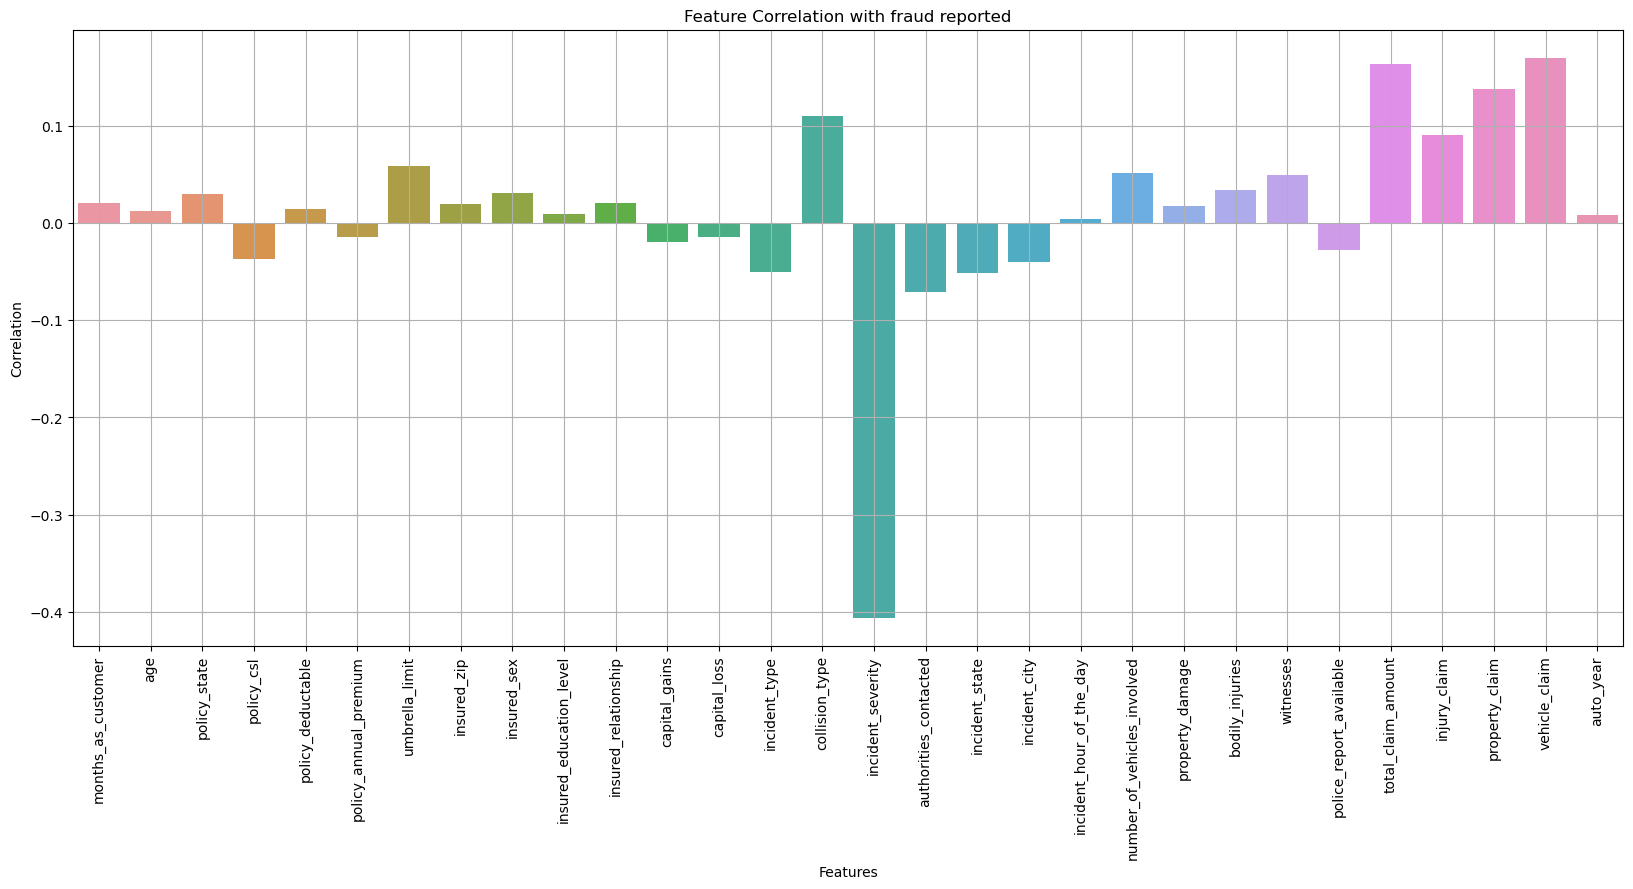

In [47]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['fraud_reported'].drop('fraud_reported').index, y=corr_matrix['fraud_reported'].drop('fraud_reported').values)
plt.title("Feature Correlation with fraud reported")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

### Splitting the data into training and test

In [48]:
#seperating independent variable and target into x and y
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (1000, 30)
Dimension of Target (1000,)


### Feature scaling using StandardScaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,1.078140,0.990836,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,1.076953,0.530931,...,-0.823865,1.520282,0.009759,0.461838,1.478078,0.714257,-0.189283,1.165505,0.749653,-0.183440
1,0.208995,0.334073,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,1.076953,0.530931,...,-0.823865,-0.657773,-1.210174,-1.338700,-0.676554,-1.807312,-1.363822,-1.372696,-1.823346,0.315491
2,-0.608002,-1.088913,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,-0.928546,1.557877,...,1.140056,-0.657773,1.229693,1.362107,-0.676554,-0.686362,0.054644,-0.736072,-0.785565,0.315491
3,0.452355,0.224613,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,-0.928546,1.557877,...,-0.823865,-0.657773,0.009759,0.461838,-0.676554,0.403135,-0.224130,-0.219722,0.677607,1.479664
4,0.208995,0.552994,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,1.076953,-1.522961,...,-0.823865,-0.657773,-1.210174,-0.438431,-0.676554,-1.753121,-1.257232,-1.399654,-1.768252,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,-0.928546,1.044404,...,-0.823865,1.520282,-1.210174,-0.438431,-0.676554,1.305049,2.051155,0.273817,1.224309,0.149180
996,0.704407,0.224613,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,-0.928546,1.557877,...,-0.823865,1.520282,1.229693,1.362107,-0.676554,2.111466,2.182342,2.214794,1.821868,1.645974
997,-0.642767,-0.541611,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,-0.928546,1.044404,...,1.140056,-0.657773,1.229693,1.362107,1.478078,0.558507,0.013648,0.020826,0.771902,-1.513924
998,2.208028,2.523284,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,1.076953,-1.522961,...,-0.823865,-0.657773,-1.210174,-0.438431,1.478078,-0.219110,-0.453708,-0.451976,-0.073580,-1.181303


We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features

In [50]:
#Checking Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,6.799862,months_as_customer
1,6.833730,age
2,1.028087,policy_state
3,1.024563,policy_csl
4,1.033089,policy_deductable
5,1.032921,policy_annual_premium
6,1.028794,umbrella_limit
7,1.022743,insured_zip
8,1.025109,insured_sex
9,1.031003,insured_education_level


The columns 'months_as_customer' and 'age' show high High multicollinearity. we will drop 'age' column

In [51]:
x.drop('age',axis=1,inplace=True)

In [52]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,1.033772,months_as_customer
1,1.027003,policy_state
2,1.023845,policy_csl
3,1.033087,policy_deductable
4,1.031698,policy_annual_premium
5,1.028776,umbrella_limit
6,1.022222,insured_zip
7,1.023380,insured_sex
8,1.030981,insured_education_level
9,1.029856,insured_relationship


### Performing PCA(Principal Component Analysis (PCA))

In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

- We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.
- We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

### Oversampling

In [54]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

We used an oversampling method to address the class imbalance problem

#### Model Selection

In [55]:
#Importing mode
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier #Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier #Gradient Boosting Classifier ,AdaBoost Classifier 
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Classifier

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum accuracy_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum accuracy_Score is=> 0.6482300884955752 On Random State=> 154


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=best_state)

#### LogisticRegression

In [59]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.6482300884955752
Confusion Matrix:- [[118 112]
 [ 47 175]]
Classification Report:-               precision    recall  f1-score   support

           0       0.72      0.51      0.60       230
           1       0.61      0.79      0.69       222

    accuracy                           0.65       452
   macro avg       0.66      0.65      0.64       452
weighted avg       0.66      0.65      0.64       452

------------------------------------------------------------


#### ExtraTreesClassifier

In [60]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

ExtraTreesClassifier()
Accuracy Score:- 0.7876106194690266
Confusion Matrix:- [[172  58]
 [ 38 184]]
Classification Report:-               precision    recall  f1-score   support

           0       0.82      0.75      0.78       230
           1       0.76      0.83      0.79       222

    accuracy                           0.79       452
   macro avg       0.79      0.79      0.79       452
weighted avg       0.79      0.79      0.79       452

------------------------------------------------------------


#### DecisionTreeClassifier

In [61]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

DecisionTreeClassifier()
Accuracy Score:- 0.6460176991150443
Confusion Matrix:- [[139  91]
 [ 69 153]]
Classification Report:-               precision    recall  f1-score   support

           0       0.67      0.60      0.63       230
           1       0.63      0.69      0.66       222

    accuracy                           0.65       452
   macro avg       0.65      0.65      0.65       452
weighted avg       0.65      0.65      0.65       452

------------------------------------------------------------


#### GradientBoostingClassifier

In [62]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.6836283185840708
Confusion Matrix:- [[143  87]
 [ 56 166]]
Classification Report:-               precision    recall  f1-score   support

           0       0.72      0.62      0.67       230
           1       0.66      0.75      0.70       222

    accuracy                           0.68       452
   macro avg       0.69      0.68      0.68       452
weighted avg       0.69      0.68      0.68       452

------------------------------------------------------------


#### AdaBoostClassifier

In [63]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(abc)
print('Accuracy Score:-',accuracy_score(y_test,pred_abc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_abc))
print('Classification Report:-',classification_report(y_test,pred_abc))
print('---'*20)

AdaBoostClassifier()
Accuracy Score:- 0.6327433628318584
Confusion Matrix:- [[124 106]
 [ 60 162]]
Classification Report:-               precision    recall  f1-score   support

           0       0.67      0.54      0.60       230
           1       0.60      0.73      0.66       222

    accuracy                           0.63       452
   macro avg       0.64      0.63      0.63       452
weighted avg       0.64      0.63      0.63       452

------------------------------------------------------------


#### RandomForestClassifier

In [64]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.745575221238938
Confusion Matrix:- [[164  66]
 [ 49 173]]
Classification Report:-               precision    recall  f1-score   support

           0       0.77      0.71      0.74       230
           1       0.72      0.78      0.75       222

    accuracy                           0.75       452
   macro avg       0.75      0.75      0.75       452
weighted avg       0.75      0.75      0.75       452

------------------------------------------------------------


#### KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.6836283185840708
Confusion Matrix:- [[122 108]
 [ 35 187]]
Classification Report:-               precision    recall  f1-score   support

           0       0.78      0.53      0.63       230
           1       0.63      0.84      0.72       222

    accuracy                           0.68       452
   macro avg       0.71      0.69      0.68       452
weighted avg       0.71      0.68      0.68       452

------------------------------------------------------------


#### SVC

In [66]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(svc)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

SVC()
Accuracy Score:- 0.6305309734513275
Confusion Matrix:- [[ 99 131]
 [ 36 186]]
Classification Report:-               precision    recall  f1-score   support

           0       0.73      0.43      0.54       230
           1       0.59      0.84      0.69       222

    accuracy                           0.63       452
   macro avg       0.66      0.63      0.62       452
weighted avg       0.66      0.63      0.62       452

------------------------------------------------------------


### Cross Validation Score

In [67]:
from sklearn.model_selection import cross_val_score

#### LogisticRegression

In [68]:
score=cross_val_score(LG,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[0.75  0.73  0.755 0.755 0.76 ]
0.75
Difference between accuracy score and cross validation score is: -10.176991150442483


#### ExtraTreesClassifier

In [69]:
score1=cross_val_score(etc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score1.mean())*100)

[0.75  0.685 0.685 0.715 0.7  ]
0.7070000000000001
Difference between accuracy score and cross validation score is: 8.061061946902647


#### DecisionTreeClassifier 

In [70]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.66  0.65  0.58  0.635 0.65 ]
0.635
Difference between accuracy score and cross validation score is: 1.1017699115044244


#### GradientBoostingClassifier

In [71]:
score3=cross_val_score(gbc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score3.mean())*100)

[0.725 0.68  0.715 0.725 0.75 ]
0.7190000000000001
Difference between accuracy score and cross validation score is: -3.537168141592928


#### AdaBoostClassifier

In [72]:
score4=cross_val_score(abc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_abc)-score4.mean())*100)

[0.74  0.725 0.71  0.75  0.755]
0.736
Difference between accuracy score and cross validation score is: -10.325663716814159


#### RandomForestClassifier

In [73]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.745 0.685 0.71  0.725 0.73 ]
0.7190000000000001
Difference between accuracy score and cross validation score is: 2.6575221238937963


#### KNeighborsClassifier

In [74]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score6.mean())*100)

[0.765 0.695 0.695 0.705 0.725]
0.717
Difference between accuracy score and cross validation score is: -3.3371681415929166


#### SVC

In [75]:
score7=cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.75  0.75  0.755 0.755 0.755]
0.7529999999999999
Difference between accuracy score and cross validation score is: -12.246902654867242


**Based on these observations**
- The RandomForestClassifier seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- RandomForestClassifier is our best fitting and best performing model

### Hyper Paramter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid={'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]}

In [79]:
GCV=GridSearchCV(rfc,param_grid,cv=5)

In [80]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]})

In [81]:
GCV.best_params_

{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [93]:
best_model=RandomForestClassifier(n_estimators=300,max_depth=30,max_features='log2',min_samples_leaf=1)
best_model.fit(x_train,y_train)
pred_RFC=best_model.predict(x_test)
print('Accuracy Score:-',accuracy_score(y_test,pred_RFC)*100)
print('Confusion Matrix:-',confusion_matrix(y_test,pred_RFC))
print('Classification Report:-',classification_report(y_test,pred_RFC))

Accuracy Score:- 75.4424778761062
Confusion Matrix:- [[165  65]
 [ 46 176]]
Classification Report:-               precision    recall  f1-score   support

           0       0.78      0.72      0.75       230
           1       0.73      0.79      0.76       222

    accuracy                           0.75       452
   macro avg       0.76      0.76      0.75       452
weighted avg       0.76      0.75      0.75       452



### My model give 75.44% accuracy

#### Plotting AUC ROC curve

In [94]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

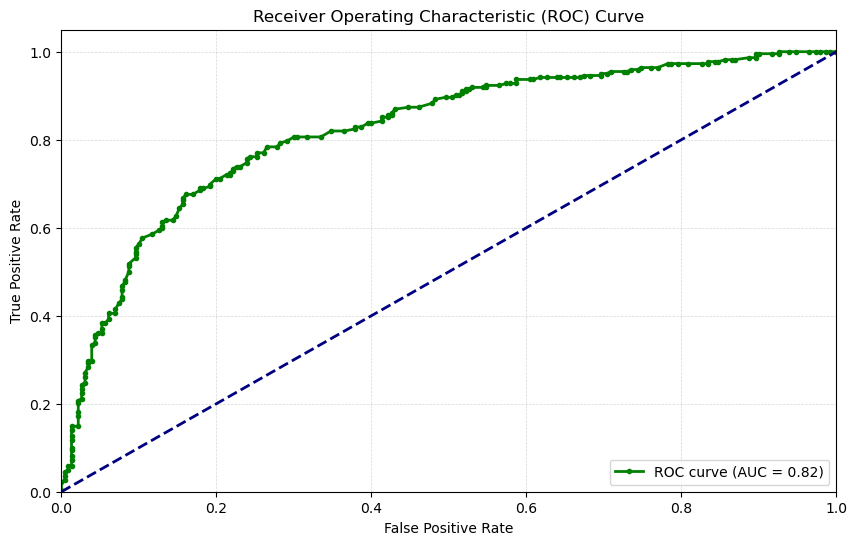

In [95]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

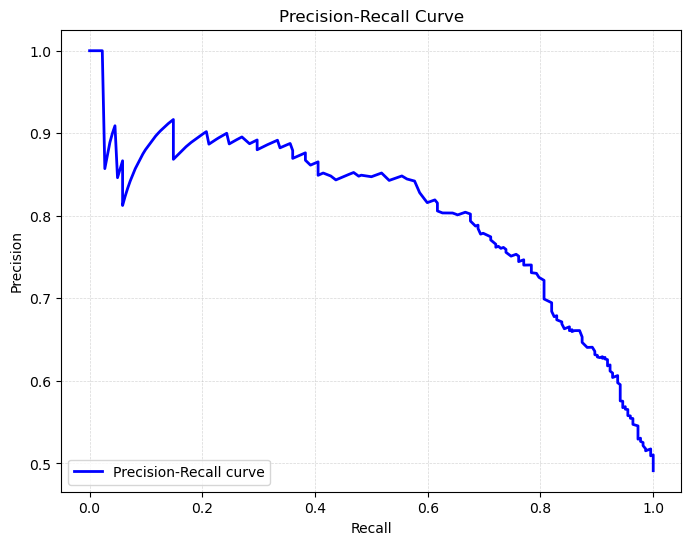

In [96]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

#### Saving the Model

In [97]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Insurance Claim Fraud Detection project.pkl")

['Insurance Claim Fraud Detection project.pkl']

In [98]:
#Now loading file and checcking prediction 
model=joblib.load("Insurance Claim Fraud Detection Project.pkl")

In [99]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [100]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1
